# Representing Data and Engineering Features


### One-Hot-Encoding

Categorical variable with one or more new features that can have values of 0 and 1. 

*Dummy encoding* in statistics it's common to encode a categorical feature with *k* different possible values into *k-1* features.

In [489]:
import pandas as pd
from IPython.display import display

data = pd.read_csv('/Users/jdchipox/Downloads/adult-training.csv',
                  names=['age', 'workclass','fnlwgt', 'education',
                        'education-num','marital-status','occupation',
                        'relationship','race','gender','capital-gain',
                        'capital-loss', 'hours-per-week', 'native-country','income'])

# Select some columns
data = data[['age', 'workclass','education',
            'gender','hours-per-week', 'occupation','income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


Check contents of a column in using `value_counts`

In [10]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [490]:
data_dummies = pd.get_dummies(data)
data_dummies.columns

Index(['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th',
       'education_ 11th', 'education_ 12th', 'education_ 1st-4th',
       'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th',
       'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors',
       'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
       'education_ Preschool', 'education_ Prof-school',
       'education_ Some-college', 'gender_ Female', 'gender_ Male',
       'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces',
       'occupation_ Craft-repair', 'occupation_ Exec-managerial',
       'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
       'occupation_ Machine-op-inspct', 'occupation_ Other-service',
   

In [491]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [492]:
# extract two columns with features 
#- all columns from age to occupation_Transport-moving

features = data_dummies.ix[:,
                          'age':'occupation_ Transport-moving']

X= features.values
y= data_dummies['income_ >50K'].values


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [493]:
print(X.shape)
print(y.shape)

(32561, 44)
(32561,)


In [494]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
train_test_split(X, y, random_state=0)

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

print('Test Score {:.2f}'.format(logreg.score(X_test,
                                              y_test)))


Test Score 0.81


/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


**Remember that the columns in the test set must be represented in the same way as in the training for ML to work**

`get_dummies` treats all numbers as continuous and will not create dummy variables for them.
You can use `OneHotEncoder` to specify which variables are continuous and which are discrete.

In [495]:
demo_df = pd.DataFrame({'Integer Feature':[0,1,2,1],
                       'Categorical Feature':['socks','fox','socks','box']})
                    

display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


`get_dummies` will only encode the string feature and will not change the integer feature. **You have to change the type of the column first**

In [496]:
display(pd.get_dummies(demo_df))

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [497]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)

# dummies
pd.get_dummies(demo_df,
               columns=['Integer Feature', 
                       'Categorical Feature'])



,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


### Binning, Discretization, Linear Models and Trees



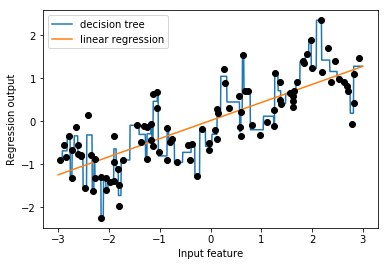

In [498]:
import mglearn as mglearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()

**To make linear models more powerful on continuos data is to use binning (discretization) of to split it up into multiple features**.

Define 10 bins equally spaced between -3 and 3 (range of our single X feature)

In [500]:
bins = np.linspace(-3,3,11)
print('bins {}'.format(bins))

bins [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


- Record for each data point which bin it falls into. `np.digitize`
- Convert a **continuous feature into a categorical feature that encodes which bin a data point is in.**

In [501]:
which_bin = np.digitize(X, bins=bins)

In [502]:
np.unique(which_bin)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [503]:
# data points
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [504]:
# membership for data points
which_bin[:5]

array([[ 4],
       [10],
       [ 8],
       [ 6],
       [ 2]])

`OneHotEncoder` basically does the same as `get_dummies` but only works on **categorical variables that are integers.**

In [505]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False, categories='auto')
#encoder.fit finds the unique valus that apper in which_bin

encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned=encoder.transform(which_bin)

In [506]:
# We specified 10 bins, transformed X_binned is made up of 10 features
X_binned[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [507]:
X_binned.shape

(100, 10)

- Now let's fit again the models

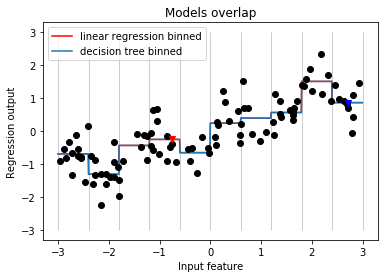

In [151]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

# Fit linear model
reg = LinearRegression().fit(X_binned, y)
# show predictions of tree
plt.plot(line, reg.predict(line_binned), label='linear regression binned', c='red')

# Fit
reg2 = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
# show predictions of tree
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
# show data points
plt.plot(X[:, 0], y, 'o', c='k')

# Show bins
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.title('Models overlap')

plt.plot(-0.7527, -0.25, 'v', c='red')
plt.plot(2.704, 0.8638, 'v', c='blue')
plt.show()

Little example to clarify what's happening:
- the linear model learns a coefficient for each feature
- our X_binned only indicates what bin our point falls into [1 there, all the rest are 0].
- Our first point X[0] has value

In [144]:
X[0]

array([-0.75275929])

- Which puts it into bin:

In [145]:
X_binned[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

The prediction of our model for this point is given by:


In [508]:
sum(X_binned[0]*reg.coef_)+reg.intercept_

0.4383375227237558

Being $x=-0.7527$ and $y=-0.2527$, was plotted as a red triangle above.

In [148]:
print(X[1])
print(X_binned[1])

[2.70428584]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [149]:
sum(X_binned[1]*reg.coef_)+reg.intercept_

0.8638703701124119

As blue triangle point $(2.704, 0.8638)$

Linear model and decision tree have exactly the same predictions, **for each bin they predict a constant value**.
- Linear model improved different value for each bin. **Benefited greatly in expressives from the transformation of the data**
- Decision tree got less flexible,  *binning has not benefit*, the model can already split data anywhere (can learn whatever binning is more useful, trees also can look many features at once)

There are good reasons to use linear model for a dataset:
- it is very large and high-dimensional.
- if some features **have nonlinear relationships** binning ca be a great way to increase modelling power.

### Interactions and Polynomials

Adding interaction features and polynomial features to original data.

In [509]:
# adding binned data(10) with original data as column => 11 cols
X_combined = np.hstack([X, 
                        X_binned])
X_combined.shape

(100, 11)

In [510]:
line_combined.shape

(1000, 11)

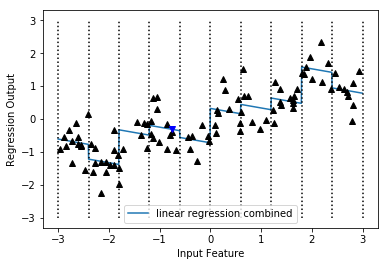

In [164]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_binned = encoder.transform(np.digitize(line, bins=bins))


reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line,
                           line_binned])

# plots line and line predictions
plt.plot(line, reg.predict(line_combined),
        label='linear regression combined')

#prints vertical lines
for bin in bins:
    plt.plot([bin, bin], [-3,3], ':', c='k')
    
    
plt.legend(loc='best')
plt.ylabel('Regression Output')
plt.xlabel('Input Feature')
plt.plot(X[:,0], y, '^', c='k')

# Triangle as little test
plt.plot(X_combined[0][0], sum(X_combined[0]*reg.coef_) + reg.intercept_, 'v', c='blue')
plt.show()

In this model we learned an offset for each bin, together with a slope, the learned slop is downward and shared across all the bins, there is a single x-axis feature, **which has a single slope**

In [513]:
X_combined[0]

array([-0.75275929,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

- We see that a single point has two values. **The original value is always at the first column!**. This means that a weight will be learned for all of this! Which is why the slope is the same across the graph.

- Before our model was a single feature binned into 10 categories. By adding back the actual value we have 11 features. 

**To have a separate slope for each bin** we can add an interaction that indicates *which bin a data point is in and where it lies in the X_axis*.

In [515]:
#
X_product = np.hstack([X_binned, X * X_binned])

In [516]:
# puts the data point at the correct bin
X[0]*X_binned[0]

array([-0.        , -0.        , -0.        , -0.75275929, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

In [517]:
X_binned[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [518]:
# We fuse the binned data and the binned datapoint data
np.hstack([X_binned[0], X[0]*X_binned[0]])

array([ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.75275929, -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ])

Now the original value for different bins are in different columns. **Which means that there is a specific gradient for each bin.**

In [179]:
X_product.shape

(100, 20)

Product feature is a separate copy of the x-axis feature for each bin + the binned data.

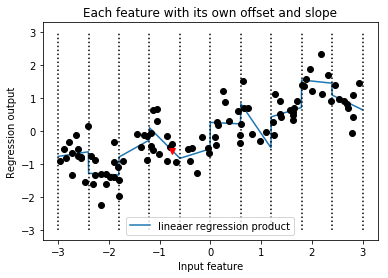

In [519]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='lineaer regression product')

for bin in bins:
    plt.plot([bin, bin], 
             [-3,3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c='k')

plt.plot(-0.7527, -0.5898, 'v', c='red')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')
plt.title('Each feature with its own offset and slope')
plt.show()

In [185]:
X[0]

array([-0.75275929])

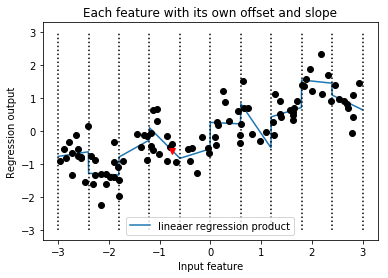

In [520]:
LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='lineaer regression product')

for bin in bins:
    plt.plot([bin, bin], 
             [-3,3], ':', c='k')

plt.plot(X[:, 0], y, 'o', c='k')

plt.plot(-0.7527, -0.5898, 'v', c='red')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')
plt.title('Each feature with its own offset and slope')
plt.show()

**Using binning is one wa to expand a continuous feature. Another way is to use polynomials**

- We might want to consider $x^2, x^3, x^4$ and so on. This is implemented in `PolynomialFeatures`

In [521]:
from sklearn.preprocessing import PolynomialFeatures

# include polynomials up to x**10
# default include_bias=True adds feature that is constantly 1

poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)


X_poly.shape

(100, 10)

In [189]:
X[:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

In [190]:
X_poly[:5]

array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01,
         3.21088306e-01, -2.41702204e-01,  1.81943579e-01,
        -1.36959719e-01,  1.03097700e-01, -7.76077513e-02,
         5.84199555e-02],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01,
         5.34823369e+01,  1.44631526e+02,  3.91124988e+02,
         1.05771377e+03,  2.86036036e+03,  7.73523202e+03,
         2.09182784e+04],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00,
         3.75414962e+00,  5.22563982e+00,  7.27390068e+00,
         1.01250053e+01,  1.40936394e+01,  1.96178338e+01,
         2.73073115e+01],
       [ 5.91950905e-01,  3.50405874e-01,  2.07423074e-01,
         1.22784277e-01,  7.26822637e-02,  4.30243318e-02,
         2.54682921e-02,  1.50759786e-02,  8.92423917e-03,
         5.28271146e-03],
       [-2.06388816e+00,  4.25963433e+00, -8.79140884e+00,
         1.81444846e+01, -3.74481869e+01,  7.72888694e+01,
        -1.59515582e+02,  3.29222321e+02, -6.79478050e+02,
         1.

In [195]:
poly.get_feature_names()

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:1386: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for c in combinations)


['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']

In [197]:
X_poly[1]

array([2.70428584e+00, 7.31316190e+00, 1.97768801e+01, 5.34823369e+01,
       1.44631526e+02, 3.91124988e+02, 1.05771377e+03, 2.86036036e+03,
       7.73523202e+03, 2.09182784e+04])

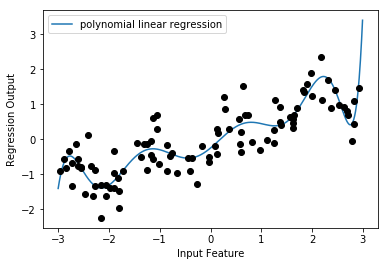

In [214]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly),
         label='polynomial linear regression')

plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('Regression Output')
plt.xlabel('Input Feature')
plt.legend(loc='best')
plt.show()

In [207]:
X[:, 0].shape

(100,)

In [208]:
X.shape

(100, 1)

- Polynomial features yield a very smooth fit on this one dimensional data.
- However, polynomials of high degree tend to behave in extreme ways on the **boundaries or in regions with little data**.

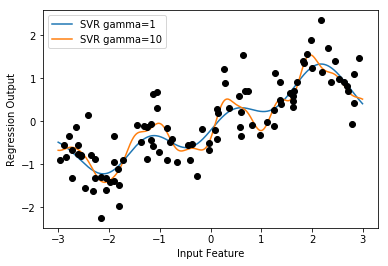

In [216]:
from sklearn.svm import SVR

for gamma in [1,10]:
    svr=SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), 
            label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:,0], y, 'o', c='k')
plt.ylabel('Regression Output')
plt.xlabel('Input Feature')
plt.legend(loc='best')
plt.show()

- Using a more complex model, a kernel SVM we are able **to learn a similarly complex prediction to the polynomial regression** without an explicit transformation of the features.

Let's check the boston data set:

In [248]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# rescale data
scaler=MinMaxScaler()
# fit and transform x_train
X_train_scaled = scaler.fit_transform(X_train)
# we don't fit again! only transform X_test
X_test_scaled = scaler.transform(X_test)


# Now we extract polynomial features up to a deg of 2
poly=PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [227]:
X_train.shape

(379, 13)

In [228]:
X_train_poly.shape

(379, 105)

105 represents all possible interactions between two different original features.

- **degree=2** here means that we look at all features that are **product of up to two original features**.

- Correspondence between input and output can be found using the `get_feature_names` method

In [238]:
len(poly.get_feature_names())
print(poly.get_feature_names())

['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:1386: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for c in combinations)


- The first new feature is a constant **1**. The next 13 features are the original features, then follows the first feature squared and combination of the first and the other features etc.

In [249]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train) 
print("Score without interactions: {:.3f}".format(
ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train) 
print("Score with interactions: {:.3f}".format(
ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


**Interactions gave a boost in performance** For random forests this is a different story.

In [250]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train) 
print("Score without interactions: {:.3f}".format(
rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train) 
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))


Score without interactions: 0.796
Score with interactions: 0.763


### Univariate Nonlinear Transformations

- Applying mathematical functions like `log, exp` or `sin` **often prove useful for transforming certain features**

- While forests only care about the ordering of the features, **linear models and neural networks** are very tied to the scale and distribution of each feature => **if there is a nonlinear relation between the feature and the target, that becomes hard to model - particularly in regression**.

Functions *log* and *exp* help by adjusting the relative scales in the data so they can be captured better by a linear or neural model. 

-**Most models work best when each feature is loosely Gaussian distributed, a histogram of each feature should have something resembling a bell shape** Using log or exp is **hacky** but is a simple and effective way to achieve this.


- Particularly common case to use this transformation is with **count data**.

In [291]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))

In [292]:
X_org.shape

(1000, 3)

In [293]:
w = rnd.normal(size=3)

In [294]:
w.shape

(3,)

In [302]:
# Synthetic DataSet
X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)

In [308]:
len(np.bincount(X[:,0]))

159

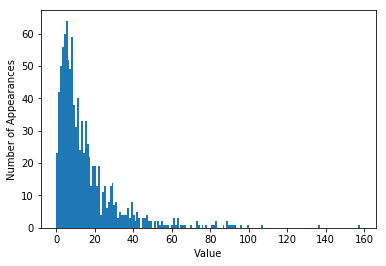

In [313]:
bins = np.bincount(X[:,0])
plt.hist(X[:,0], bins=len(np.bincount(X[:,0])))
plt.ylabel('Number of Appearances')
plt.xlabel('Value')
plt.show()

- This kind of distrubtion of many small ones and a few large ones is very common in practice. **But it's something linear models can't handle very well**

In [477]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)

print('Test Score {:.3f}'.format(score))



Test Score 0.005


- Our Ridge was not able to capture this data well. Applying log could help. **because 0 appears in our data we have to compute** $log(X+1)$.

In [322]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

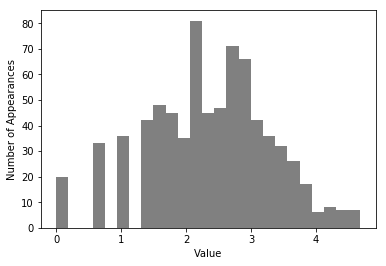

In [326]:
plt.hist(X_train_log[:,0],
                bins=25, color='gray')
plt.ylabel('Number of Appearances')
plt.xlabel('Value')
plt.show()

Using this representation **Ridge performs waay better**.

In [327]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log,
                                                y_test)
print('Test Score: {:.3f}'.format(score))

Test Score: 0.885


**Finding the transformation that works best for each combination of dataset and model is somewhat of an art**

In this example, all features had the same properties. In real life, this is rarely the case. **Sometimes each feature needs to be transformed in a different way**.
- Sometimes is also a good idea to **transform the target variable y**.

### Automatic Feature Selection

Increasing the dimensionality of data way beyond the number of original features makes **models more complex increasing chance of overfitting**.

**When adding more features is a good idea to only use useful features** But how to know how good a feature is?
- Univariate statistics
- model-based selection
- iterative selection

### Univariate Statistics

Compute wether there is a **statistically significant relationship between each feature and the target**. Features related with the highest confidence are selected. In classification this is also known as **ANOVA**(analysis of variance).

- These tests only consider features individually, a feature will be discareded if it is only informative when combined with another feature.
- Are very fast to compute, don't require a model.


In scikit-learn to use **univariate feature selection** 
- You choose test (usually) `f_classif` (for classification) or `f_regression` 
- A method for discarding parameters based on the p-values determined in the test. These methods differe in how they compute this treshold, simplest one being `SelectKBest` which selects a fixed number of k features and `SelectPercentile` which selects a fixed percentage of features.

Let's apply this kind of feature selection for cancer dataset. We will add some noninformative noise feature to the data, we expect feature selecton to identify the non-informative ones.

In [331]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# get deterministic random number
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# The first 30 are data, next 50 cols are trash

X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise,
                                                   cancer.target,
                                                   random_state=0,
                                                   test_size=0.5)

# use f_classif (default) SelectPercentile select 50% of features

select = SelectPercentile(percentile=50)
# Interesting FIT!
select.fit(X_train, y_train)

# transform training set
X_train_selected = select.transform(X_train)

print(X_train.shape)
print(X_train_selected.shape)


(284, 80)
(284, 40)


**50% of features were seleced**. Using `get_support` method we can check which were selected.

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


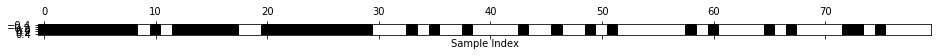

In [333]:
mask = select.get_support()
print(mask)
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Sample Index')
plt.show()

- Most of the selected features are the beginning, but it is not perfect!

In [334]:
from sklearn.linear_model import LogisticRegression 

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test))) 
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
lr.score(X_test_selected, y_test)))

Score with all features: 0.930
Score with only selected features: 0.940


/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- **UNIVARIATE FEATURE SELECTION can still be very helpful, if there is such a large number of features that building a model on them is infeasible**

### Model Based Feature Selection


`SelectFromModel`
Uses a supervised learning model to judge the importance of each feature, keeping only the most important ones. 

Decision tree-based models provide a `feature_importances_` attribute, which directly encodes the importance of each feature. Or also linear-models with **L1** penalty learn sparse cofficients.

- In contrast to univariate feature selection, model feature selection can capture interactions.

In [338]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100,
                                                random_state=42),
                        threshold='median')

`SelectFromModel` selects all features that have an importance measure of the feature greater than the provided threshold. Using `median` **half of the features are selected**

- This is quite a complex model and **more powerful than univariate tests**

In [340]:
# NICE FIT!
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

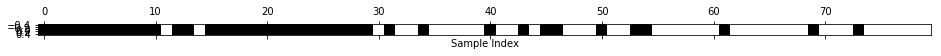

In [344]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Sample Index')
plt.show()


- This time all but two of two of the original features were selected. **Because we specified 40 instaed of 30 (original ones) some will be unavoidably selected**

In [345]:
X_test_selected = select.transform(X_test)
score = LogisticRegression().fit(X_train_selected,
                                 y_train).score(X_test_selected, y_test)
print(score)

0.9508771929824561


/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- We got some improvements here.

### Iterative Feature Selection

In univariate we used no model, model-based selection we use one model. Here we use **a series of model with varying numbers of features**


There are two basic methods:
- starting with no features and adding features one by one until a stopping criterion
- starting with all features and discarding until a stopping criterion

One particular method of this kind is **recursive feature elimination (RFE)** which starts with all features builds a model, and discards the least important feature according to the model etc.


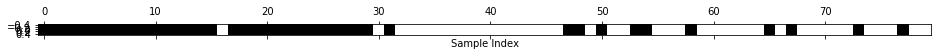

In [350]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, 
                                    random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)
# visualize selected features
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Sample Index')
plt.show()

In [348]:
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test) 
print("Test score: {:.3f}".format(score))

Test score: 0.951


/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- In most real-world cases **applying feature selection is unlikely to provide large gains in performance** However is still a valuable tool in the toolbox of the feature engineer.

Adding a feature does not force a model to use it, even if it turns out to be non-informative augmenting the data with this information doesn't hurt.

### New York Bike Rental



In [523]:
citibike = mglearn.datasets.load_citibike()
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

#### Bike frequencis for whole month

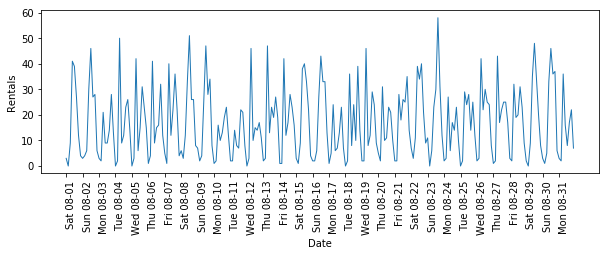

In [524]:
plt.figure(figsize=(10, 3))
# Daily frequency!
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(),
                       freq='D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")
plt.show()


- We see day/night pattern, sat/sun seem different too.

**For time series data we often want to learn from the past and predict the future**, we use data up to a certain date as training and the the rest as test.

- We use 184 data points (23 first days) the other 8 days will be test data.

In [525]:
y = citibike.values

# POSIX TIME!
X= citibike.index.strftime("%s").astype('int').values.reshape(-1,1)

We first define a function to split the data into training and test sets, build the model and visualize the result.

In [526]:
n_train = 184

def eval_on_features(features, target, regressor):
    # split the given features into a training and test
    X_train, X_test = features[:n_train], features[n_train:]
    # split the target array
    y_train, y_test = target[:n_train], target[n_train:]
    
    # 
    regressor.fit(X_train, y_train)
    print('Test set R^2 {:.2f}'.format(regressor.score(X_test, y_test)))
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    
    plt.figure(figsize=(10,6))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")
    
    
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    
    
    # plotting prediction
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
                 label="prediction test", c='blue')
    
    plt.legend(loc=(1.01,0))
    plt.xlabel('Date')
    plt.ylabel('Rentals')
    plt.show()

Test set R^2 -0.04


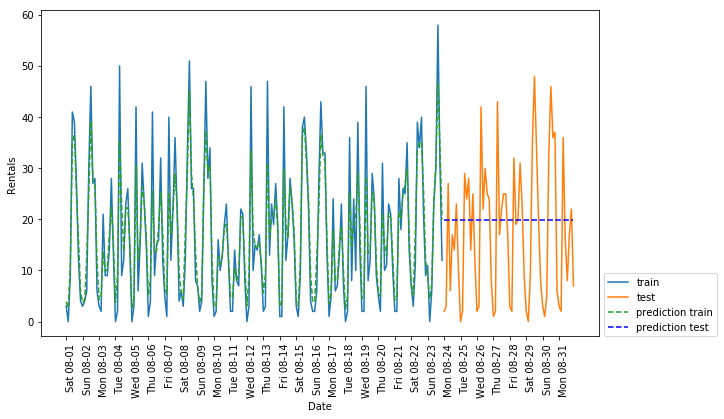

In [527]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)

# X is POSIX TIME
eval_on_features(X, y, regressor)


- We learned nothing, because the value of the POSIX time feature is outside the range of the feature values in the training set.
- Trees and therefore, random forests **cannot extrapolate to feature ranges outside the training set** Result is that the model simply predicts the target value of the closest point in the training.

In [528]:
X[0:5]

array([[1438380000],
       [1438390800],
       [1438401600],
       [1438412400],
       [1438423200]])

- Two features seem to be very important, time of the day and day of the week. 
- Let's add back these features, we can't learn anything from POSIX time so drop it!

Test set R^2 0.60


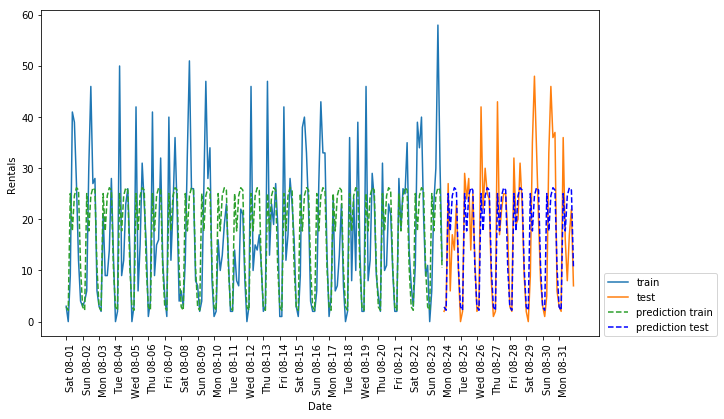

In [529]:
# X IS HOURS OLNLY
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour, y, regressor)

In [533]:
np.unique(X_hour)

array([ 0,  3,  6,  9, 12, 15, 18, 21])

Let's add the day of the week

Test set R^2 0.84


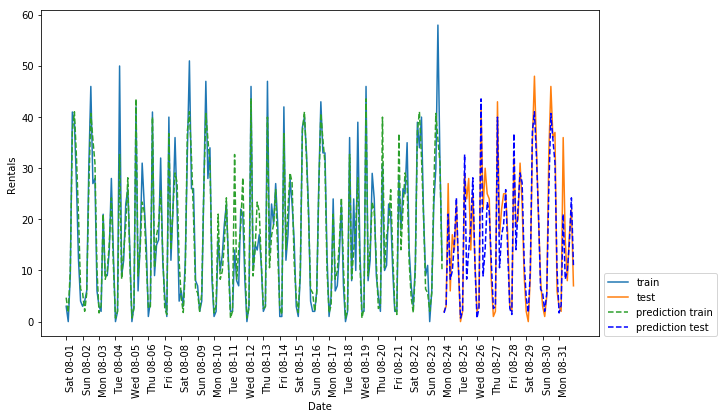

In [534]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1),
                         citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week, y, regressor)

In [535]:
np.unique(X_hour_week)

array([ 0,  1,  2,  3,  4,  5,  6,  9, 12, 15, 18, 21])

In [537]:
X_hour_week[0]

array([5, 0])

Now we have a model that captures the periodic behavior by considering day and time of the day.
-  What the model is likely learning is the mean number of rentals for each combination of weekday and time of the day. 
- This doesn't require such a complex model

Test set R^2 0.13


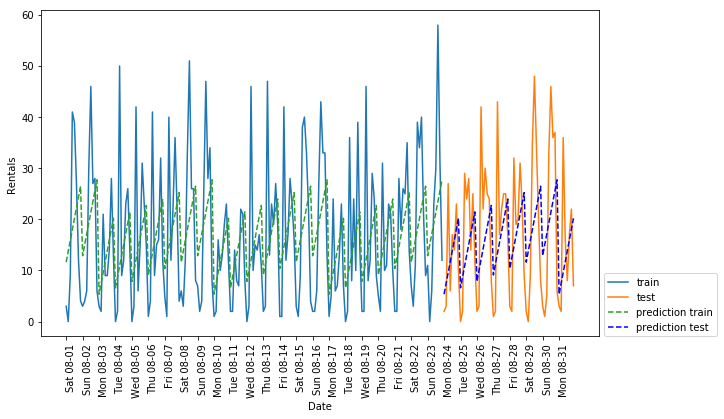

In [386]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

With linear regression we get it much worse, because we encoded **day of week and time of day as integers** which are interpreted as numerical variables.

In [399]:
print(X_hour_week[:,0].dtype)
print(X_hour_week[:,1].dtype)

int64
int64


- We can capture more by **interpreting integers as categorical variables with the `OneHotEncoder`**

In [422]:
# day
print(np.unique(X_hour_week[:,0]))
# hour
print(np.unique(X_hour_week[:,1]))
print('15 encoded features')

[0 1 2 3 4 5 6]
[ 0  3  6  9 12 15 18 21]
15 encoded features


In [406]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week)
print(type(X_hour_week_onehot))
X_hour_week_onehot = X_hour_week_onehot.toarray()
print(type(X_hour_week_onehot))

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>


/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [408]:
X_hour_week_onehot.shape

(248, 15)

Test set R^2 0.62


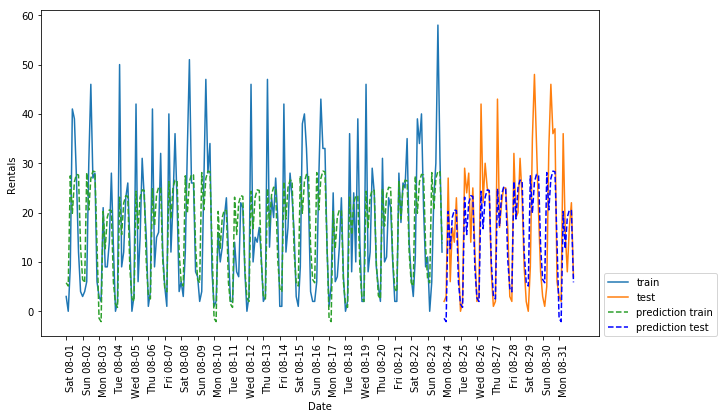

In [423]:
eval_on_features(X_hour_week_onehot, y, Ridge())

- Gives us a much better match tna continuos feature encoding. Now the linear model learns a coefficient for each time of the day an day. **Which means that the time of day pattern is shared over all days**


- One coefficient for each day and one coefficient for each hour!!!



In [538]:
X_hour_week_onehot[0]

array([0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [539]:
X_hour_week_onehot[1]

array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

!!!  **Using interaction features, we can allow the model to learn one coefficient for each combination of day and time of day** !!!!

Test set R^2 0.85


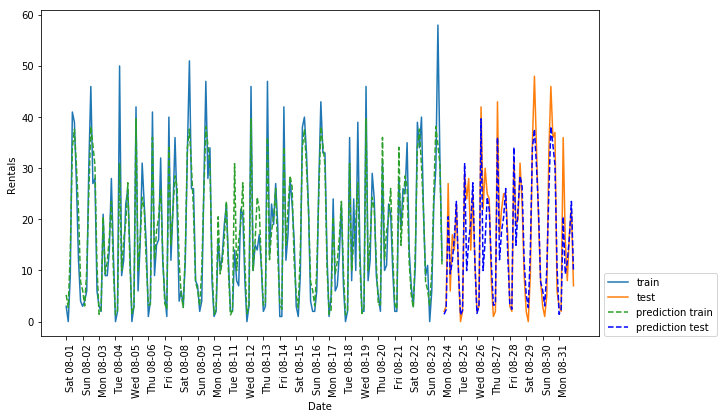

In [410]:
poly_transformer = PolynomialFeatures(degree=2,
                                      interaction_only=True,
                                      include_bias=False,)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr=Ridge()

eval_on_features(X_hour_week_onehot_poly, y, lr)

- A big benefit of this model is that it is clear what was leanred: **one coefficient for each day and time**.

In [541]:
X_hour_week_onehot_poly[1]

array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

**One coefficient for each combination of day and hour** + **A coefficient for each hour and each day (individually)**

In [461]:
15 + len(list(itertools.combinations('dlmMjvs03692581', 2)))

120

In [462]:
len(poly_transformer.get_feature_names(features))

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:1386: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for c in combinations)


120

In [424]:
X_hour_week_onehot_poly.shape

(248, 120)

In [470]:
# 8 hours
hour = ["%02d:00" % i for i in range(0, 24, 3)]
# 7 days
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"] 
features = day + hour

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_!=0]
coef_nonzero = lr.coef_[lr.coef_ !=0]

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:1386: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  for c in combinations)


In [475]:
# Plotting weights that aren't not zero
len(coef_nonzero)

71

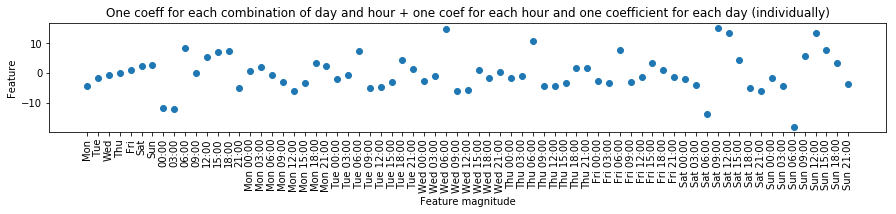

In [545]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature magnitude")
plt.ylabel("Feature")
plt.title('One coeff for each combination of day and hour + one coef for each hour and one coefficient for each day (individually)')
plt.show()

### Summary 

- Represent data in a way suitable way for your algorithm z.B by one-hot-encoding your variables
- Linear models might benefit greatly from generating new features by binning and adding polynominals and interactions.